In [1]:
from pathlib import Path
import numpy as np
import xarray as xr
import pygmt

import ensaio
import boule as bl
import verde as vd
import harmonica as hm

In [2]:
color="white"
# color="black"
pygmt.config(
    FONT_ANNOT=f"11p,Helvetica,{color}",
    FONT_TITLE=f"12p,Helvetica,{color}",
    FONT_LABEL=f"10p,Helvetica,{color}",
    # MAP_TITLE_OFFSET="0p",
    # MAP_FRAME_WIDTH="2p",
)
dpi = 600

In [3]:
figs_dir = Path("..") / "figs"
if not figs_dir.exists():
    figs_dir.mkdir()

In [4]:
fname = ensaio.fetch_earth_geoid(version=1)
geoid = xr.load_dataarray(fname)
geoid

<xarray.DataArray 'geoid' (latitude: 1081, longitude: 2161)> Size: 19MB
array([[-29.5, -29.5, -29.5, ..., -29.5, -29.5, -29.5],
       [-29.5, -29.5, -29.5, ..., -29.5, -29.5, -29.5],
       [-29.6, -29.6, -29.6, ..., -29.6, -29.6, -29.6],
       ...,
       [ 14.7,  14.7,  14.7, ...,  14.7,  14.7,  14.7],
       [ 15.2,  15.2,  15.2, ...,  15.2,  15.2,  15.2],
       [ 15.4,  15.4,  15.4, ...,  15.4,  15.4,  15.4]])
Coordinates:
  * longitude  (longitude) float64 17kB -180.0 -179.8 -179.7 ... 179.8 180.0
  * latitude   (latitude) float64 9kB -90.0 -89.83 -89.67 ... 89.67 89.83 90.0
Attributes:
    Conventions:     CF-1.8
    title:           Geoid height (EIGEN-6C4) with respect to WGS84
    crs:             WGS84
    source:          Generated from the EIGEN-6C4 model by the ICGEM Calculat...
    license:         Creative Commons Attribution 4.0 International Licence
    references:      https://doi.org/10.5880/icgem.2015.1
    long_name:       geoid height
    standard_name:   geoid_height_above_reference_ellipsoid
    description:     height of the geoid with respect to the WGS84 ellipsoid
    units:           m
    actual_range:    [-106.5   86. ]
    icgem_metadata:  generating_institute: gfz-potsdam\ngenerating_date: 2021...

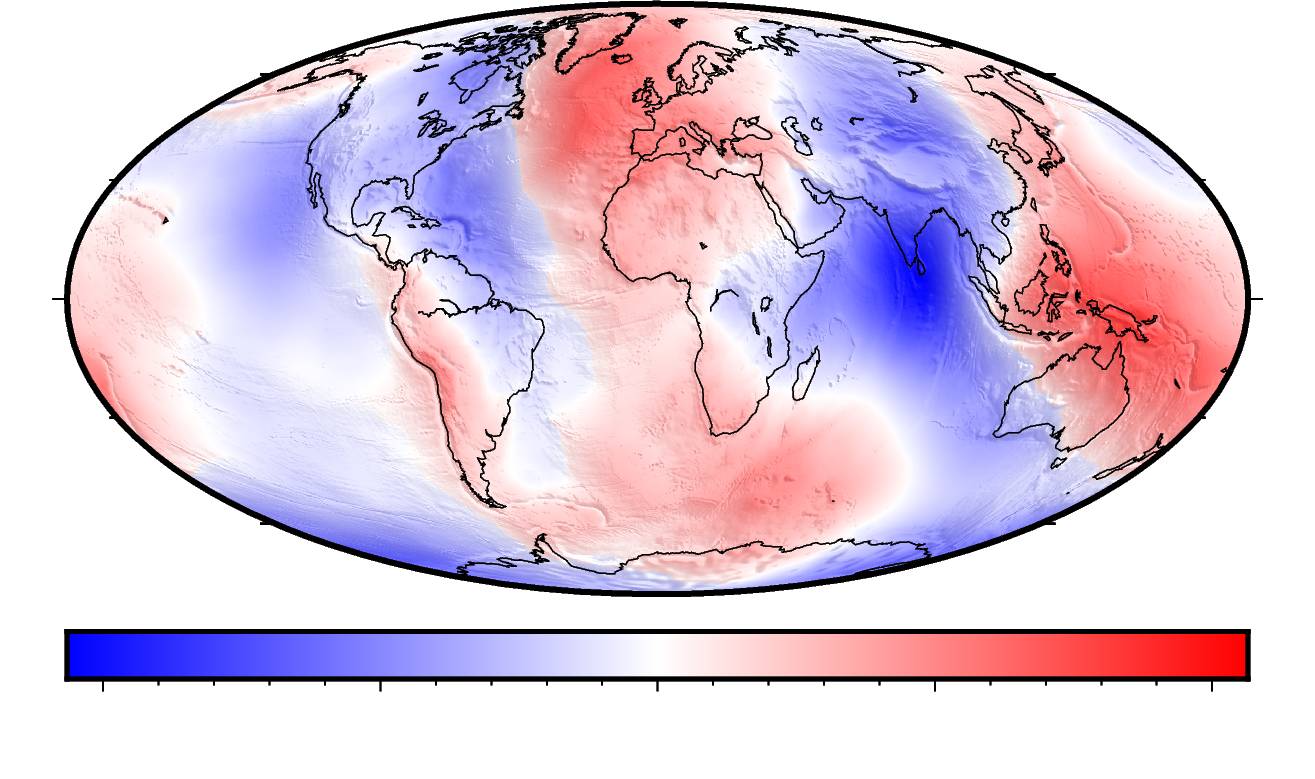

In [5]:
fig = pygmt.Figure()
maxabs = vd.maxabs(geoid)
pygmt.makecpt(series=[-maxabs, maxabs], cmap="polar+h")
fig.grdimage(
    geoid,
    projection="W10c",
    shading="+a45+nt0.2",
)
fig.basemap(frame=["af", "WEsn"])
fig.colorbar(
    position="JCB+w10c",
    frame=["af", 'y+l"m"', 'x+l"geoid height"'],
)
fig.coast(shorelines=True, resolution="c", area_thresh=1e4)
fig.savefig(figs_dir / "geoid-height.png", dpi=dpi, transparent=True)
fig.show()

In [6]:
fname = ensaio.fetch_earth_gravity(version=1)
observed_gravity = xr.load_dataarray(fname)
observed_gravity

<xarray.DataArray 'gravity' (latitude: 1081, longitude: 2161)> Size: 19MB
array([[980106.525, 980106.525, 980106.525, ..., 980106.525, 980106.525,
        980106.525],
       [980108.225, 980108.225, 980108.225, ..., 980108.225, 980108.225,
        980108.225],
       [980108.825, 980108.825, 980108.825, ..., 980108.725, 980108.725,
        980108.825],
       ...,
       [980153.825, 980153.725, 980153.625, ..., 980153.925, 980153.825,
        980153.825],
       [980160.425, 980160.425, 980160.425, ..., 980160.425, 980160.425,
        980160.425],
       [980157.525, 980157.525, 980157.525, ..., 980157.525, 980157.525,
        980157.525]])
Coordinates:
  * longitude  (longitude) float64 17kB -180.0 -179.8 -179.7 ... 179.8 180.0
  * latitude   (latitude) float64 9kB -90.0 -89.83 -89.67 ... 89.67 89.83 90.0
    height     (latitude, longitude) float32 9MB 1e+04 1e+04 ... 1e+04 1e+04
Attributes:
    Conventions:     CF-1.8
    title:           Gravity acceleration (EIGEN-6C4) at a constant geometric...
    crs:             WGS84
    source:          Generated from the EIGEN-6C4 model by the ICGEM Calculat...
    license:         Creative Commons Attribution 4.0 International Licence
    references:      https://doi.org/10.5880/icgem.2015.1
    long_name:       gravity acceleration
    description:     magnitude of the gravity acceleration vector (gravitatio...
    units:           mGal
    actual_range:    [974748.6 980201.9]
    icgem_metadata:  generating_institute: gfz-potsdam\ngenerating_date: 2021...

In [7]:
height_str, = np.unique(observed_gravity.height.values)
height_str = f"{height_str:.0f}"
height_str

'10000'

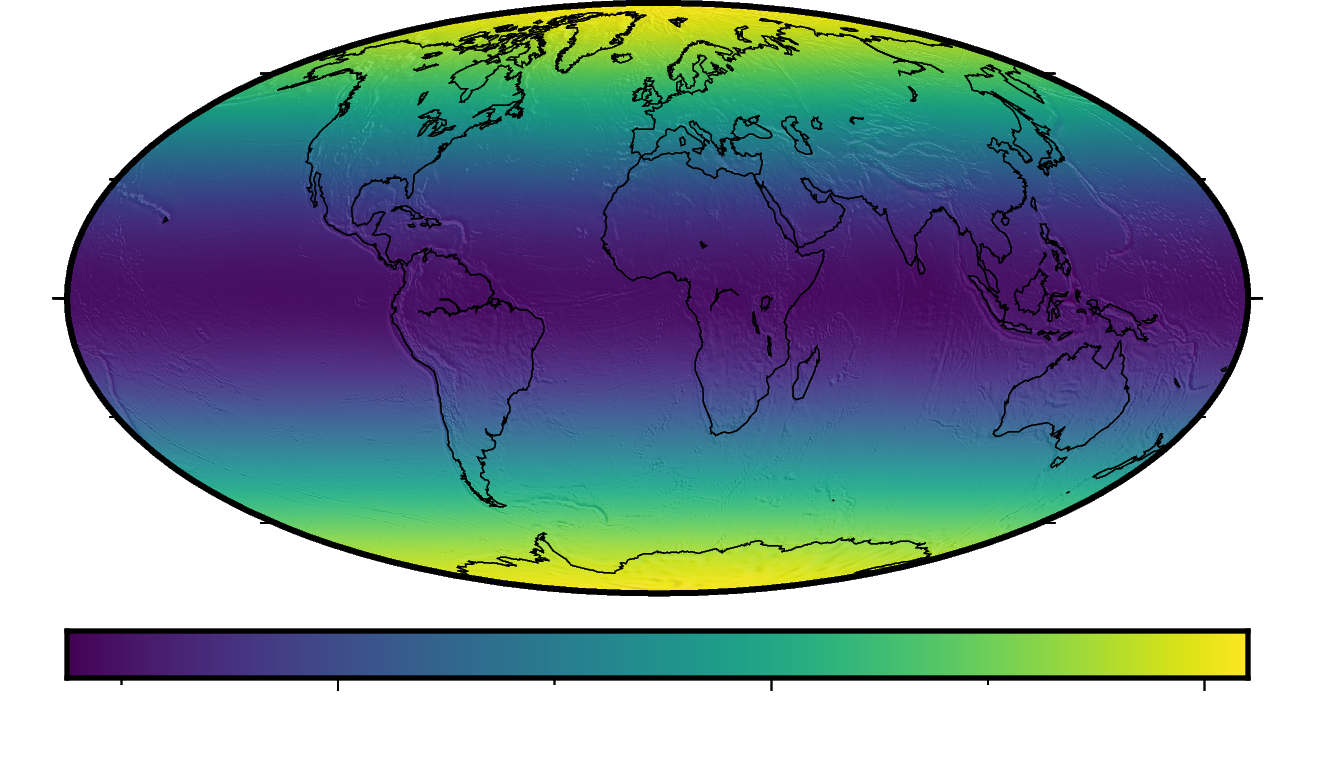

In [8]:
fig = pygmt.Figure()
fig.grdimage(
    observed_gravity,
    projection="W10c",
    cmap="viridis",
    shading="+a45+nt0.2",
)
fig.basemap(frame=["af", "WEsn"])
fig.colorbar(
    position="JCB+w10c",
    frame=["af", 'y+l"mGal"', f'x+l"observed disturbance (at {height_str} m over ell)"'],
)
fig.coast(shorelines=True, resolution="c", area_thresh=1e4)
fig.savefig(figs_dir / "observed-gravity.png", dpi=dpi, transparent=True)
fig.show()

In [9]:
disturbance = observed_gravity - bl.WGS84.normal_gravity(latitude=observed_gravity.latitude, height=observed_gravity.height)
disturbance

<xarray.DataArray (latitude: 1081, longitude: 2161)> Size: 19MB
array([[-35.81009235, -35.81009235, -35.81009235, ..., -35.81009235,
        -35.81009235, -35.81009235],
       [-34.06597894, -34.06597894, -34.06597894, ..., -34.06597894,
        -34.06597894, -34.06597894],
       [-33.33364042, -33.33364042, -33.33364042, ..., -33.43364042,
        -33.43364042, -33.33364042],
       ...,
       [ 11.66635958,  11.56635958,  11.46635958, ...,  11.76635958,
         11.66635958,  11.66635958],
       [ 18.13402106,  18.13402106,  18.13402106, ...,  18.13402106,
         18.13402106,  18.13402106],
       [ 15.18990765,  15.18990765,  15.18990765, ...,  15.18990765,
         15.18990765,  15.18990765]])
Coordinates:
  * longitude  (longitude) float64 17kB -180.0 -179.8 -179.7 ... 179.8 180.0
  * latitude   (latitude) float64 9kB -90.0 -89.83 -89.67 ... 89.67 89.83 90.0
    height     (latitude, longitude) float32 9MB 1e+04 1e+04 ... 1e+04 1e+04

grdgradient [WARNING]: Longitude range too small; geographic boundary condition changed to natural.
grdimage [WARNING]: Longitude range too small; geographic boundary condition changed to natural.


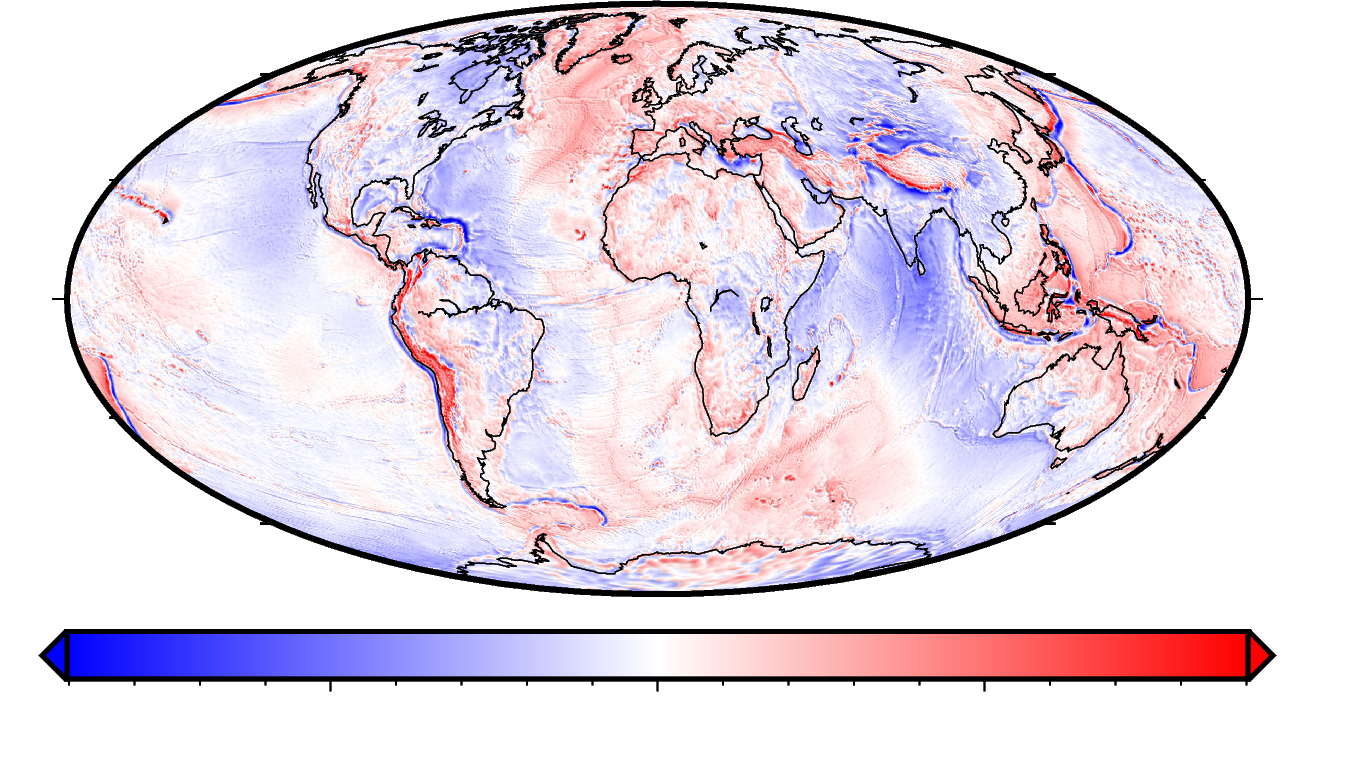

In [10]:
fig = pygmt.Figure()
maxabs = 0.4 * vd.maxabs(disturbance)
pygmt.makecpt(series=[-maxabs, maxabs], cmap="polar+h", background="o")
fig.grdimage(
    disturbance,
    projection="W10c",
    shading="+a45+nt0.2",
)
fig.basemap(frame=["af", "WEsn"])
fig.colorbar(
    position="JCB+w10c+e", # use +e for adding the triangles at the end (use also background="o" in makecpt)
    frame=["af", 'y+l"mGal"', f'x+l"gravity disturbance (at {height_str} m over ell)"'],
)
fig.coast(shorelines=True, resolution="c", area_thresh=1e4)
fig.savefig(figs_dir / "disturbance.png", dpi=dpi, transparent=True)
fig.show()

In [11]:
zero_height = 0 * observed_gravity.height
anomaly = observed_gravity - bl.WGS84.normal_gravity(latitude=observed_gravity.latitude, height=zero_height)
anomaly

<xarray.DataArray (latitude: 1081, longitude: 2161)> Size: 19MB
array([[-3111.96878631, -3111.96878631, -3111.96878631, ...,
        -3111.96878631, -3111.96878631, -3111.96878631],
       [-3110.22471024, -3110.22471024, -3110.22471024, ...,
        -3110.22471024, -3110.22471024, -3110.22471024],
       [-3109.49248355, -3109.49248355, -3109.49248355, ...,
        -3109.59248355, -3109.59248355, -3109.49248355],
       ...,
       [-3064.49248355, -3064.59248355, -3064.69248355, ...,
        -3064.39248355, -3064.49248355, -3064.49248355],
       [-3058.02471024, -3058.02471024, -3058.02471024, ...,
        -3058.02471024, -3058.02471024, -3058.02471024],
       [-3060.96878631, -3060.96878631, -3060.96878631, ...,
        -3060.96878631, -3060.96878631, -3060.96878631]])
Coordinates:
  * longitude  (longitude) float64 17kB -180.0 -179.8 -179.7 ... 179.8 180.0
  * latitude   (latitude) float64 9kB -90.0 -89.83 -89.67 ... 89.67 89.83 90.0
    height     (latitude, longitude) float32 9MB 1e+04 1e+04 ... 1e+04 1e+04

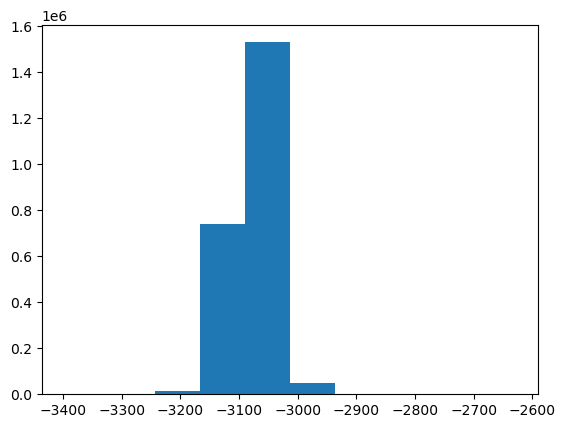

In [12]:
import matplotlib.pyplot as plt
plt.hist(anomaly.values.ravel())
plt.show()

grdgradient [WARNING]: Longitude range too small; geographic boundary condition changed to natural.
grdimage [WARNING]: Longitude range too small; geographic boundary condition changed to natural.


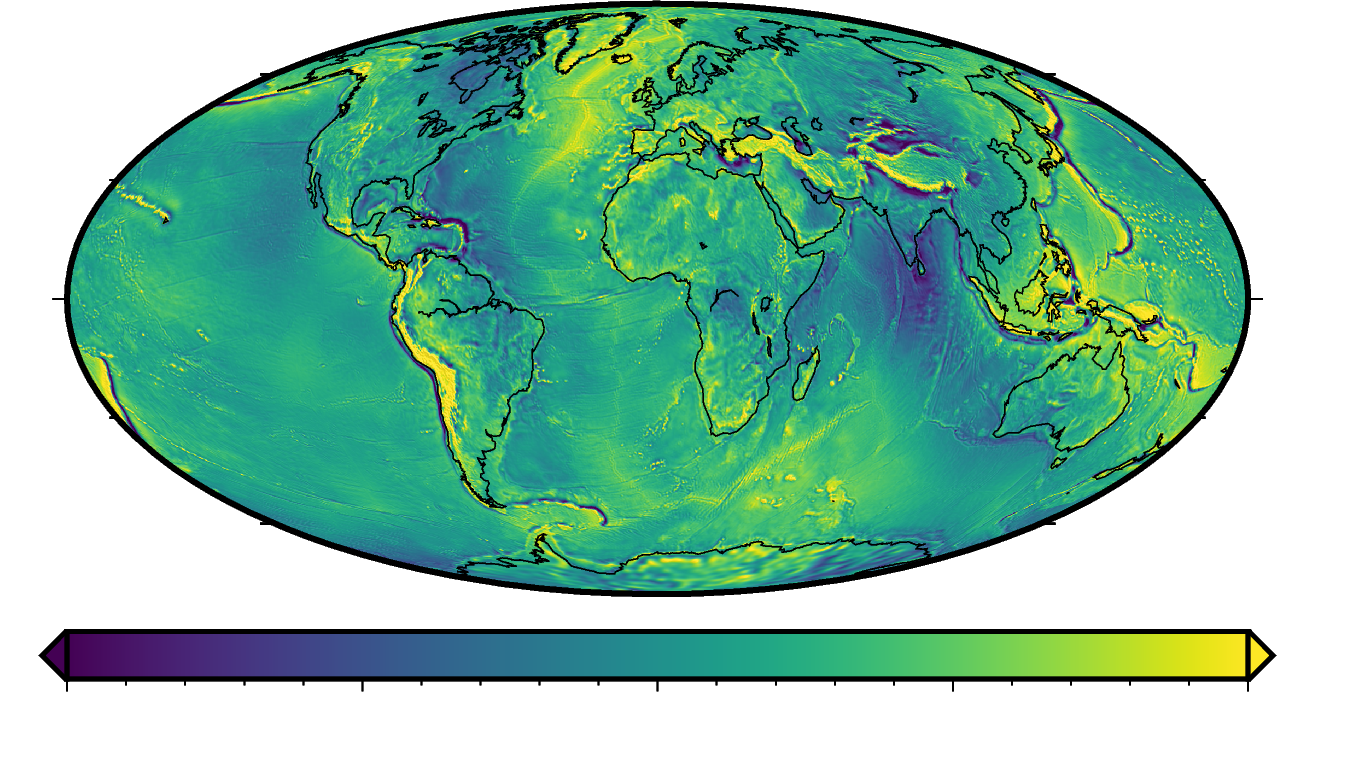

In [13]:
fig = pygmt.Figure()
vmin, vmax = -3200, -3000
pygmt.makecpt(series=[vmin, vmax], cmap="viridis", background="o")
fig.grdimage(
    anomaly,
    projection="W10c",
    shading="+a45+nt0.2",
)
fig.basemap(frame=["af", "WEsn"])
fig.colorbar(
    position="JCB+w10c+e",
    frame=["af", 'y+l"mGal"', f'x+l"gravity anomaly (at {height_str} m over ell)"'],
)
fig.coast(shorelines=True, resolution="c", area_thresh=1e4)
fig.savefig(figs_dir / "anomaly.png", dpi=dpi, transparent=True)
fig.show()

In [14]:
height_over_geoid = observed_gravity.height - geoid
free_air = anomaly + 0.3086 * height_over_geoid

# free_air = anomaly + 0.3086 * observed_gravity.height
free_air

<xarray.DataArray (latitude: 1081, longitude: 2161)> Size: 19MB
array([[-16.86508631, -16.86508631, -16.86508631, ..., -16.86508631,
        -16.86508631, -16.86508631],
       [-15.12101024, -15.12101024, -15.12101024, ..., -15.12101024,
        -15.12101024, -15.12101024],
       [-14.35792355, -14.35792355, -14.35792355, ..., -14.45792355,
        -14.45792355, -14.35792355],
       ...,
       [ 16.97109645,  16.87109645,  16.77109645, ...,  17.07109645,
         16.97109645,  16.97109645],
       [ 23.28456976,  23.28456976,  23.28456976, ...,  23.28456976,
         23.28456976,  23.28456976],
       [ 20.27877369,  20.27877369,  20.27877369, ...,  20.27877369,
         20.27877369,  20.27877369]])
Coordinates:
  * longitude  (longitude) float64 17kB -180.0 -179.8 -179.7 ... 179.8 180.0
  * latitude   (latitude) float64 9kB -90.0 -89.83 -89.67 ... 89.67 89.83 90.0
    height     (latitude, longitude) float32 9MB 1e+04 1e+04 ... 1e+04 1e+04

grdgradient [WARNING]: Longitude range too small; geographic boundary condition changed to natural.
grdimage [WARNING]: Longitude range too small; geographic boundary condition changed to natural.


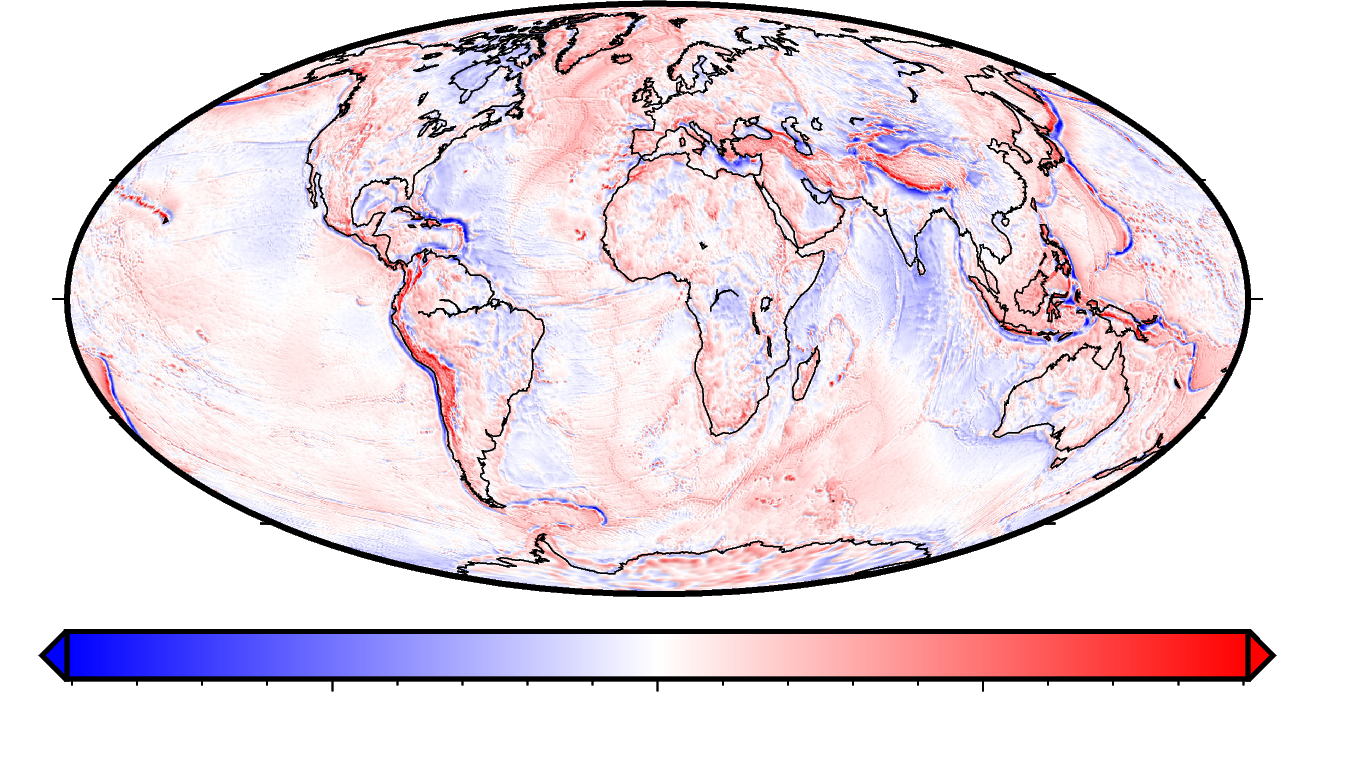

In [15]:
fig = pygmt.Figure()
maxabs = 0.4 * vd.maxabs(free_air)
pygmt.makecpt(series=[-maxabs, maxabs], cmap="polar+h", background="o")
fig.grdimage(
    free_air,
    projection="W10c",
    shading="+a45+nt0.2",
)
fig.basemap(frame=["af", "WEsn"])
fig.colorbar(
    position="JCB+w10c+e",
    frame=["af", 'y+l"mGal"', f'x+l"free-air anomaly (at {height_str} m over ell)"'],
)
fig.coast(shorelines=True, resolution="c", area_thresh=1e4)
fig.savefig(figs_dir / "free-air-anomaly.png", dpi=dpi, transparent=True)
fig.show()

In [16]:
difference = disturbance - free_air
difference

<xarray.DataArray (latitude: 1081, longitude: 2161)> Size: 19MB
array([[-18.94500604, -18.94500604, -18.94500604, ..., -18.94500604,
        -18.94500604, -18.94500604],
       [-18.9449687 , -18.9449687 , -18.9449687 , ..., -18.9449687 ,
        -18.9449687 , -18.9449687 ],
       [-18.97571687, -18.97571687, -18.97571687, ..., -18.97571687,
        -18.97571687, -18.97571687],
       ...,
       [ -5.30473687,  -5.30473687,  -5.30473687, ...,  -5.30473687,
         -5.30473687,  -5.30473687],
       [ -5.1505487 ,  -5.1505487 ,  -5.1505487 , ...,  -5.1505487 ,
         -5.1505487 ,  -5.1505487 ],
       [ -5.08886604,  -5.08886604,  -5.08886604, ...,  -5.08886604,
         -5.08886604,  -5.08886604]])
Coordinates:
  * longitude  (longitude) float64 17kB -180.0 -179.8 -179.7 ... 179.8 180.0
  * latitude   (latitude) float64 9kB -90.0 -89.83 -89.67 ... 89.67 89.83 90.0
    height     (latitude, longitude) float32 9MB 1e+04 1e+04 ... 1e+04 1e+04

grdgradient [WARNING]: Longitude range too small; geographic boundary condition changed to natural.
grdimage [WARNING]: Longitude range too small; geographic boundary condition changed to natural.


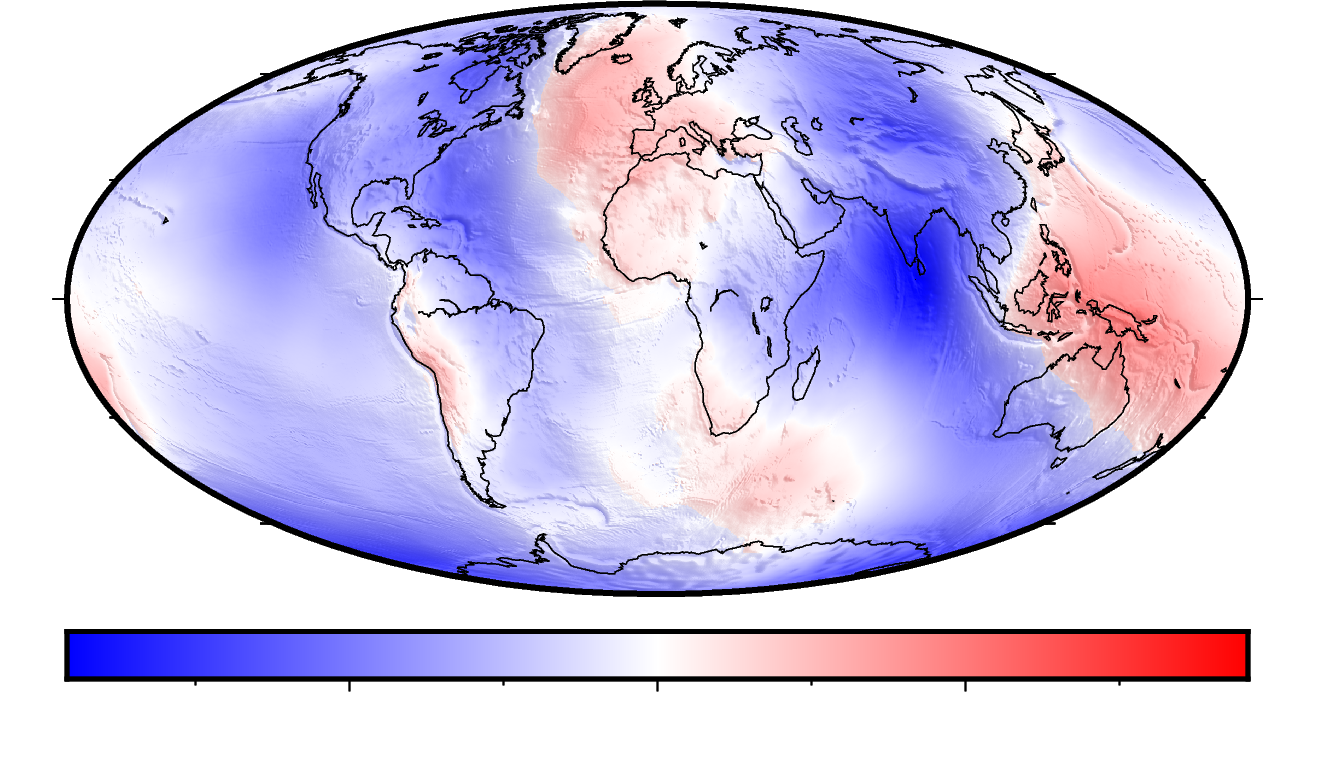

In [17]:
fig = pygmt.Figure()
maxabs = vd.maxabs(difference)
pygmt.makecpt(series=[-maxabs, maxabs], cmap="polar+h")
fig.grdimage(
    difference,
    projection="W10c",
    shading="+a45+nt0.2",
)
fig.basemap(frame=["af", "WEsn"])
fig.colorbar(
    position="JCB+w10c",
    frame=["af", 'y+l"mGal"', 'x+l"disturbance - free-air anomaly"'],
)
fig.coast(shorelines=True, resolution="c", area_thresh=1e4)
fig.savefig(figs_dir / "disturbance-minus-free-air.png", dpi=dpi, transparent=True)
fig.show()